In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
from scipy.sparse import dok_matrix
import multiprocessing as mp
import scipy as sp
import matplotlib.ticker as ticker
import project

In [2]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})

In [3]:
#loading up the parameters

params_HH = project.utils.load_HH()
params_LIF = project.utils.load_LIF()
params_IZH = project.utils.load_ISH()
params_ML = project.utils.load_ML()

#time parameters
t_final = 1500
dt = 0.01



#Other constant parameters
num_neurons = 5
#Variation for the initial conditions
volt_var = np.random.normal(0,5,num_neurons)
rec_var = np.random.normal(0,1,num_neurons)
Isyn = 0.5
tau = 0.65
V0 = -65 * np.ones(num_neurons) + volt_var
y0 = -65 * np.ones(num_neurons) + volt_var
w0 = 0 * np.ones(num_neurons) + rec_var
u0 = 0 * np.ones(num_neurons) + rec_var
n0 = 0 * np.ones(num_neurons) + rec_var
m0 = 0 * np.ones(num_neurons) + rec_var
h0 = 0 * np.ones(num_neurons) + rec_var
order = 2


#fixing random seed
np.random.seed(1234)

#generating the intensities
I_HH = np.zeros((int(t_final/dt),num_neurons))
I_IF = np.zeros((int(t_final/dt),num_neurons))
I_IZH = np.zeros((int(t_final/dt),num_neurons))
I_ML = np.zeros((int(t_final/dt),num_neurons))

for i in range(0,num_neurons):
    x_normal = np.random.normal(0,5,int(t_final/dt))
    x_if = np.random.normal(0,1.5,int(t_final/dt))
    I_HH[:,i] = 2.5 * (1 + 1*x_normal)
    I_IF[:,i] = 2.5 * (1 + 1*x_if)
    I_IZH[:,i] = 2.5 * (1 + 1*x_normal)
    I_ML[:,i] = 2.5 * (1+ 1*x_normal)
    #I_HH[:,i] = 2.5 
    #I_IF[:,i] = 2.5 
    #I_IZH[:,i] = 2.5
    #I_ML[:,i] = 2.5 

HH_gap_junction = np.zeros((int(t_final/dt),num_neurons))
HH_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

IF_gap_junction = np.zeros((int(t_final/dt),num_neurons))
IF_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

IZH_gap_junction = np.zeros((int(t_final/dt),num_neurons))
IZH_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

ML_gap_junction = np.zeros((int(t_final/dt),num_neurons))
ML_synaptic_current = np.zeros((int(t_final/dt),num_neurons))

In [4]:
#Creating the Electrical and Chemical connectivity matrices, in this case for 10 neurons
E_matrix,seed = project.utils.create_matrix('electrical',num_neurons,connection_fraction_e=1)
C_matrix, seed = project.utils.create_matrix('chemical',num_neurons,connection_fraction_c=1)

In [19]:
dataHH_adjust, completeHH_adjust, matrixHH_adjust, synaptic_HH = project.models.HH_Neuron_Network_tests(dt,t_final,order,V0,n0,m0,h0,*params_HH,I_HH,Isyn,0.0012,tau,E_matrix,C_matrix,HH_gap_junction,HH_synaptic_current)
dataIF_adjust, completeIF_adjust, matrixIF_adjust, synaptic_IF = project.models.LIF_Neuron_Network_tests(dt, t_final,order,y0,*params_LIF,I_IF,Isyn,0.0012,tau,0.0012*50,E_matrix,C_matrix, IF_gap_junction, IF_synaptic_current)
dataIZH_adjust, completeIZH_adjust, matrixIZH_adjust, synaptic_IZH = project.models.IZH_Neuron_Network_tests(dt,t_final,order,y0,u0,I_IZH,Isyn,*params_IZH,0.004,tau,E_matrix,C_matrix,IZH_gap_junction,IZH_synaptic_current)
dataML_adjust, completeML_adjust, matrixML_adjust, synaptic_ML = project.models.ML_Neuron_Network_tests(dt,t_final,2,y0,w0,*params_ML,I_ML,Isyn,0.0008,tau,E_matrix,C_matrix, ML_gap_junction, ML_synaptic_current)

(1200.0, 1500.0)

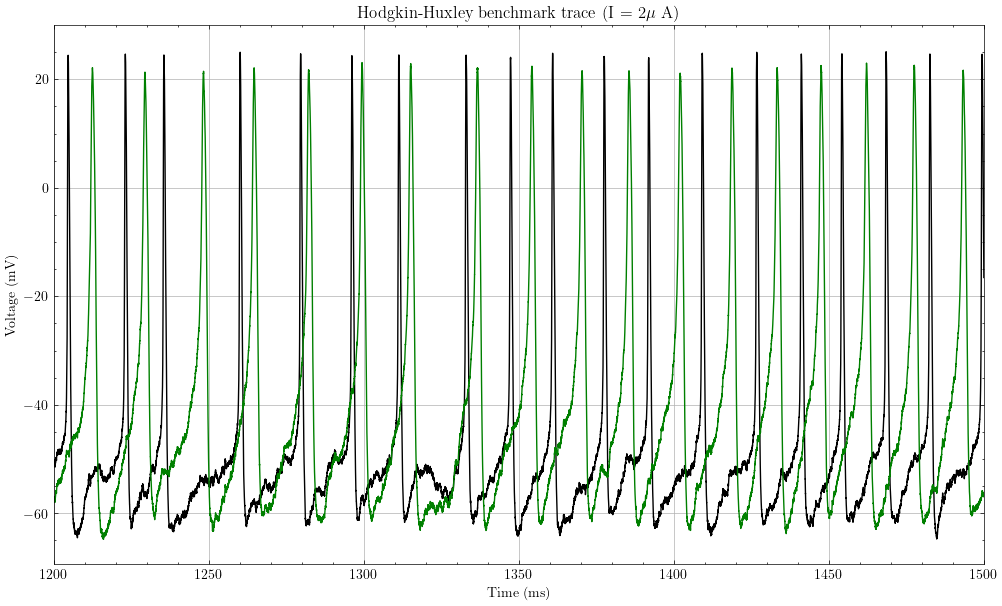

In [26]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,dataHH_adjust[:,4], color = 'black')
plt.plot(time,dataML_adjust[:,4], color = 'green')
plt.title(r'Hodgkin-Huxley benchmark trace (I = 2$\mu$ A)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.xlim(1200,1500)

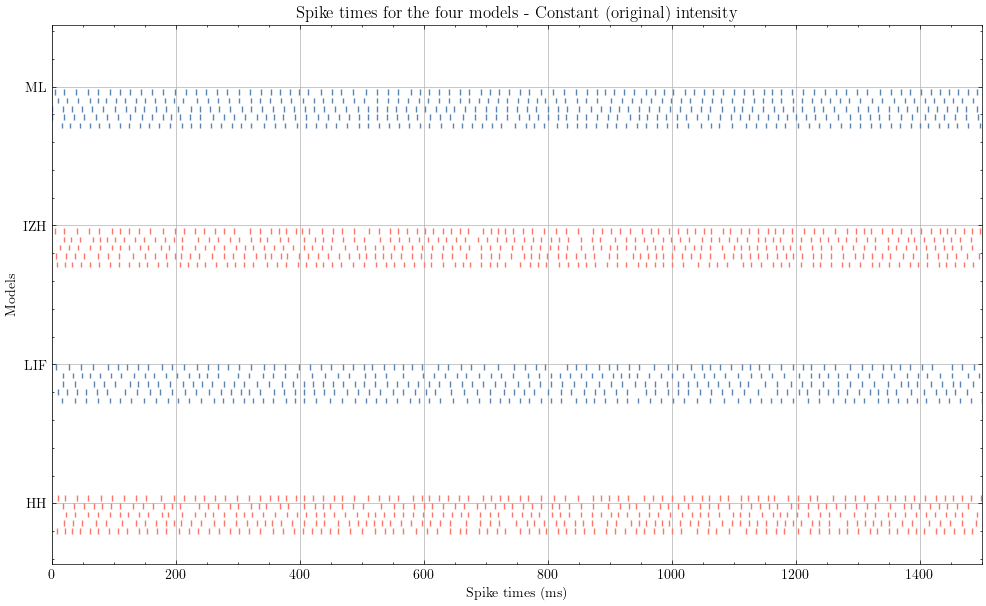

In [27]:
spike_HH_1 =  (np.argwhere(np.array(matrixHH_adjust.todense())[0,:]>0) * dt).flatten()
spike_HH_2 =  (np.argwhere(np.array(matrixHH_adjust.todense())[1,:]>0) * dt).flatten()
spike_HH_3 =  (np.argwhere(np.array(matrixHH_adjust.todense())[2,:]>0) * dt).flatten()
spike_HH_4 =  (np.argwhere(np.array(matrixHH_adjust.todense())[3,:]>0) * dt).flatten()
spike_HH_5 =  (np.argwhere(np.array(matrixHH_adjust.todense())[4,:]>0) * dt).flatten()
#spike_HH_6 =  (np.argwhere(np.array(matrixHH_adjust.todense())[5,:]>0) * dt).flatten()
#spike_HH_7 =  (np.argwhere(np.array(matrixHH_adjust.todense())[6,:]>0) * dt).flatten()
#spike_HH_8 =  (np.argwhere(np.array(matrixHH_adjust.todense())[7,:]>0) * dt).flatten()
#spike_HH_9 =  (np.argwhere(np.array(matrixHH_adjust.todense())[8,:]>0) * dt).flatten()
#spike_HH_10 =  (np.argwhere(np.array(matrixHH_adjust.todense())[9,:]>0) * dt).flatten()

spike_IF_1 =  (np.argwhere(np.array(matrixIF_adjust.todense())[0,:]>0) * dt).flatten()
spike_IF_2 =  (np.argwhere(np.array(matrixIF_adjust.todense())[1,:]>0) * dt).flatten()
spike_IF_3 =  (np.argwhere(np.array(matrixIF_adjust.todense())[2,:]>0) * dt).flatten()
spike_IF_4 =  (np.argwhere(np.array(matrixIF_adjust.todense())[3,:]>0) * dt).flatten()
spike_IF_5 =  (np.argwhere(np.array(matrixIF_adjust.todense())[4,:]>0) * dt).flatten()
#spike_IF_6 =  (np.argwhere(np.array(matrixIF_adjust.todense())[5,:]>0) * dt).flatten()
#spike_IF_7 =  (np.argwhere(np.array(matrixIF_adjust.todense())[6,:]>0) * dt).flatten()
#spike_IF_8 =  (np.argwhere(np.array(matrixIF_adjust.todense())[7,:]>0) * dt).flatten()
#spike_IF_9 =  (np.argwhere(np.array(matrixIF_adjust.todense())[8,:]>0) * dt).flatten()
#spike_IF_10 =  (np.argwhere(np.array(matrixIF_adjust.todense())[9,:]>0) * dt).flatten()

spike_IZH_1 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[0,:]>0) * dt).flatten()
spike_IZH_2 = (np.argwhere(np.array(matrixIZH_adjust.todense())[1,:]>0) * dt).flatten()
spike_IZH_3 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[2,:]>0) * dt).flatten()
spike_IZH_4 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[3,:]>0) * dt).flatten()
spike_IZH_5 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[4,:]>0) * dt).flatten()
#spike_IZH_6 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[5,:]>0) * dt).flatten()
#spike_IZH_7 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[6,:]>0) * dt).flatten()
#spike_IZH_8 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[7,:]>0) * dt).flatten()
#spike_IZH_9 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[8,:]>0) * dt).flatten()
#spike_IZH_10 =  (np.argwhere(np.array(matrixIZH_adjust.todense())[9,:]>0) * dt).flatten()

spike_ML_1 = (np.argwhere(np.array(matrixML_adjust.todense())[0,:]>0) * dt).flatten()
spike_ML_2 = (np.argwhere(np.array(matrixML_adjust.todense())[1,:]>0) * dt).flatten()
spike_ML_3 =  (np.argwhere(np.array(matrixML_adjust.todense())[2,:]>0) * dt).flatten()
spike_ML_4 =  (np.argwhere(np.array(matrixML_adjust.todense())[3,:]>0) * dt).flatten()
spike_ML_5 =  (np.argwhere(np.array(matrixML_adjust.todense())[4,:]>0) * dt).flatten()
#spike_ML_6 =  (np.argwhere(np.array(matrixML_adjust.todense())[5,:]>0) * dt).flatten()
#spike_ML_7 =  (np.argwhere(np.array(matrixML_adjust.todense())[6,:]>0) * dt).flatten()
#spike_ML_8 =  (np.argwhere(np.array(matrixML_adjust.todense())[7,:]>0) * dt).flatten()
#spike_ML_9 =  (np.argwhere(np.array(matrixML_adjust.todense())[8,:]>0) * dt).flatten()
#spike_ML_10 =  (np.argwhere(np.array(matrixML_adjust.todense())[9,:]>0) * dt).flatten()

fig, ax = plt.subplots()

ax.eventplot(spike_HH_1, color = '#FC766AFF', linelengths=0.1, lineoffsets=0)
ax.eventplot(spike_HH_2,color='#FC766AFF',lineoffsets=0.15,linelengths=0.1)
ax.eventplot(spike_HH_3, color = '#FC766AFF', lineoffsets = 0.3, linelengths=0.1)
ax.eventplot(spike_HH_4, color = '#FC766AFF', lineoffsets = 0.45, linelengths=0.1)
ax.eventplot(spike_HH_5, color = '#FC766AFF', lineoffsets = 0.60, linelengths=0.1)
#ax.eventplot(spike_HH_6, color = '#FC766AFF', lineoffsets = 0.75, linelengths=0.1)
#ax.eventplot(spike_HH_7, color = '#FC766AFF', lineoffsets = 0.90, linelengths=0.1)
#ax.eventplot(spike_HH_8, color = '#FC766AFF', lineoffsets = 1.05, linelengths=0.1)
#ax.eventplot(spike_HH_9, color = '#FC766AFF', lineoffsets = 1.2, linelengths=0.1)
#ax.eventplot(spike_HH_10, color = '#FC766AFF', lineoffsets = 1.35, linelengths=0.1)


ax.eventplot(spike_IF_2,color = '#5B84B1FF',lineoffsets=2.5, linelengths=0.1)
ax.eventplot(spike_IF_1, color = '#5B84B1FF', lineoffsets= 2.35, linelengths=0.1)
ax.eventplot(spike_IF_3, color ='#5B84B1FF', lineoffsets= 2.65, linelengths=0.1)
ax.eventplot(spike_IF_4, color = '#5B84B1FF', lineoffsets= 2.80, linelengths=0.1)
ax.eventplot(spike_IF_5, color = '#5B84B1FF', lineoffsets= 2.95, linelengths=0.1)
#ax.eventplot(spike_IF_6, color ='#5B84B1FF', lineoffsets= 3.1, linelengths=0.1)
#ax.eventplot(spike_IF_7, color = '#5B84B1FF', lineoffsets= 3.25, linelengths=0.1)
#ax.eventplot(spike_IF_8, color = '#5B84B1FF', lineoffsets= 3.40, linelengths=0.1)
#ax.eventplot(spike_IF_9, color = '#5B84B1FF', lineoffsets= 3.55, linelengths=0.1)
#ax.eventplot(spike_IF_10, color = '#5B84B1FF', lineoffsets= 3.70, linelengths=0.1)


ax.eventplot(spike_IZH_2,color = '#FC766AFF',lineoffsets= 5.15-0.2, linelengths=0.1 )
ax.eventplot(spike_IZH_1, color = '#FC766AFF', lineoffsets= 5.0-0.2, linelengths=0.1)
ax.eventplot(spike_IZH_3,color = '#FC766AFF',lineoffsets= 5.3-0.2, linelengths=0.1 )
ax.eventplot(spike_IZH_4,color = '#FC766AFF',lineoffsets= 5.45-0.2, linelengths=0.1 )
ax.eventplot(spike_IZH_5,color = '#FC766AFF',lineoffsets= 5.6-0.2, linelengths=0.1 )
#ax.eventplot(spike_IZH_6,color = '#FC766AFF',lineoffsets= 5.75-0.2, linelengths=0.1 )
#ax.eventplot(spike_IZH_7,color = '#FC766AFF',lineoffsets= 5.9-0.2, linelengths=0.1 )
#ax.eventplot(spike_IZH_8,color = '#FC766AFF',lineoffsets= 6.05-0.2, linelengths=0.1 )
#ax.eventplot(spike_IZH_9,color = '#FC766AFF',lineoffsets= 6.2-0.2, linelengths=0.1 )
#ax.eventplot(spike_IZH_10,color = '#FC766AFF',lineoffsets= 6.35-0.2, linelengths=0.1 )


ax.eventplot(spike_ML_2, color = '#5B84B1FF', lineoffsets= 7.65-0.2, linelengths=0.1)
ax.eventplot(spike_ML_1,color = '#5B84B1FF', lineoffsets= 7.5-0.2, linelengths=0.1)
ax.eventplot(spike_ML_3,color = '#5B84B1FF', lineoffsets= 7.80-0.2, linelengths=0.1)
ax.eventplot(spike_ML_4,color = '#5B84B1FF', lineoffsets= 7.95-0.2, linelengths=0.1)
ax.eventplot(spike_ML_5,color = '#5B84B1FF', lineoffsets= 8.1-0.2, linelengths=0.1)
#ax.eventplot(spike_ML_6,color = '#5B84B1FF', lineoffsets= 8.25-0.2, linelengths=0.1)
#ax.eventplot(spike_ML_7,color = '#5B84B1FF', lineoffsets= 8.4-0.2, linelengths=0.1)
#ax.eventplot(spike_ML_8,color = '#5B84B1FF', lineoffsets= 8.55-0.2, linelengths=0.1)
#ax.eventplot(spike_ML_9,color = '#5B84B1FF', lineoffsets= 8.7-0.2, linelengths=0.1)
#ax.eventplot(spike_ML_10,color = '#5B84B1FF', lineoffsets= 8.85-0.2, linelengths=0.1)


ax.set_ylim(-0.6,9.1)
ax.set_ylabel('Models')
plt.yticks((0.5,3.0,5.5,8.0))
labels = [item.get_text() for item in ax.get_yticklabels()]
labels[0] = 'HH'
labels[1] = 'LIF'
labels[2] = 'IZH'
labels[3] = 'ML'

ax.set_yticklabels(labels, color = 'black')
ax.set_xlabel('Spike times (ms)')
ax.set_xlim(0,1500)

plt.title('Spike times for the four models - Constant (original) intensity')
plt.show()

(0.0, 10000.0)

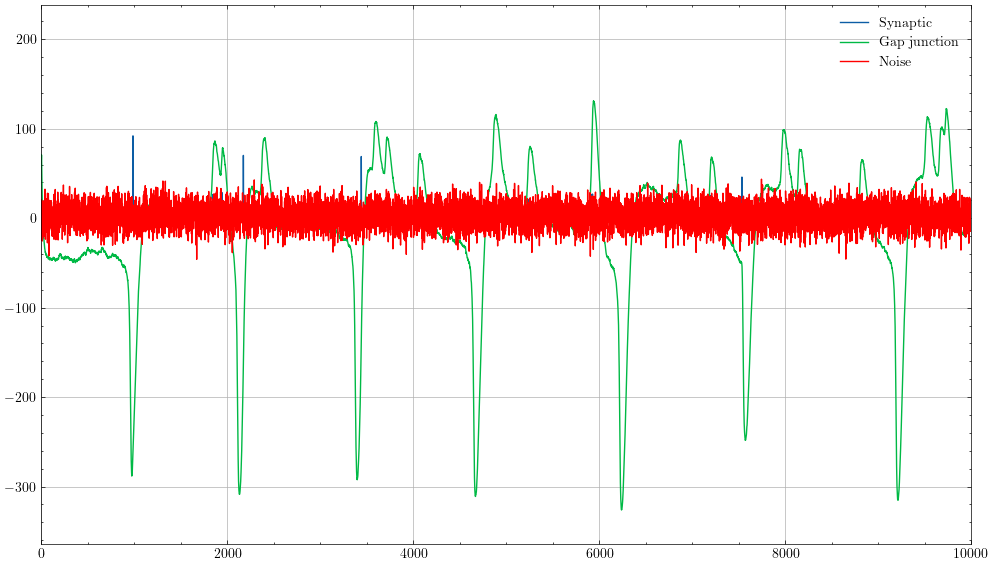

In [28]:
plt.plot(HH_synaptic_current[:,0], label = 'Synaptic')
plt.plot(HH_gap_junction[:,0], label = 'Gap junction')
plt.plot(I_HH[:,0], 'r-' ,label = 'Noise')
plt.legend()
plt.xlim(0,10000)

In [29]:
print(np.mean(HH_synaptic_current[:,0]),
np.mean(HH_gap_junction[:,0]),
np.mean(I_HH[:,0]))

0.06413757402496825 -0.19445845590081492 2.4925614350720005


In [30]:
print(np.mean(HH_synaptic_current[:,0]),np.mean(HH_synaptic_current[:,1]),np.mean(HH_synaptic_current[:,2]),np.mean(HH_synaptic_current[:,3]),np.mean(HH_synaptic_current[:,4]))

0.06413757402496825 0.062210374919712534 0.06544737097735963 0.06398425618788056 0.06291494975870682


In [31]:
print(np.mean(HH_gap_junction[:,0]),np.mean(HH_gap_junction[:,1]),np.mean(HH_gap_junction[:,2]),np.mean(HH_gap_junction[:,3]),np.mean(HH_gap_junction[:,4]))

-0.19445845590081492 0.2165076554829604 0.5508834990948102 -0.1648434134048737 -0.4080892852720822


In [32]:
print(np.mean(IF_gap_junction[:,0]),np.mean(IF_gap_junction[:,1]),np.mean(IF_gap_junction[:,2]),np.mean(IF_gap_junction[:,3]),np.mean(IF_gap_junction[:,4]))

0.47437750970970305 -0.6054006527481522 0.04754950087753218 0.13703715065703986 -0.053563508496122646
